## 30. Akses nilai variabel dalam fungsi query

##### Import Modules

In [2]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.3.3
1.21.2


In [2]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,8,4,18,12,19
1,18,15,5,17,16
2,13,5,16,15,8
3,17,6,15,19,7
4,13,15,16,10,8


##### Akses nilai variabel pada `query()`

In [3]:
df.query('A > 5')

,A,B,C,D,E
0,8,4,18,12,19
1,18,15,5,17,16
2,13,5,16,15,8
3,17,6,15,19,7
4,13,15,16,10,8


In [4]:
rerata = df['A'].mean()
rerata

13.8

In [5]:
df.query('A > @rerata')

,A,B,C,D,E
1,18,15,5,17,16
3,17,6,15,19,7


## 31. Tipe data ordinal pada Pandas Data Frame

In [6]:
d = {'pelanggan' : [11, 12, 13, 14],
    'kepuasan' : ['baik', 'cukup', 'buruk', 'cukup']}

df = pd.DataFrame(d)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


##### Tipe data ordinal pada Pandas

In [7]:
from pandas.api.types import CategoricalDtype

# membuat tipe data ordinal baru
tingkat_kepuasan = CategoricalDtype(['buruk', 'cukup', 'baik', 'sangat baik'],
                                   ordered = True)

df['kepuasan'] = df['kepuasan'].astype(tingkat_kepuasan)
df

,pelanggan,kepuasan
0,11,baik
1,12,cukup
2,13,buruk
3,14,cukup


In [8]:
df = df.sort_values('kepuasan', ascending = True)
df

,pelanggan,kepuasan
2,13,buruk
1,12,cukup
3,14,cukup
0,11,baik


In [9]:
df[df['kepuasan'] > 'cukup' ]

,pelanggan,kepuasan
0,11,baik


## 32. Visualisasi Data - Plotting

##### Persiapan Data Frame

In [10]:
n_rows = 40
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)),
                 columns = cols)
df.head()

,A,B,C,D,E
0,7,14,1,7,10
1,3,2,1,12,9
2,18,9,18,18,5
3,11,7,7,8,15
4,14,5,19,16,7


##### Line Plot

<AxesSubplot:>

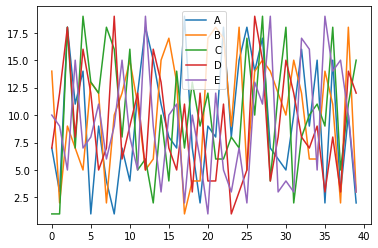

In [11]:
df.plot(kind = 'line')

<AxesSubplot:>

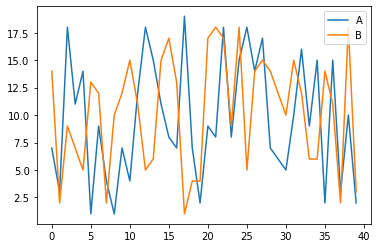

In [12]:
df[['A','B']].plot(kind = 'line')

##### Bar Plot

<AxesSubplot:>

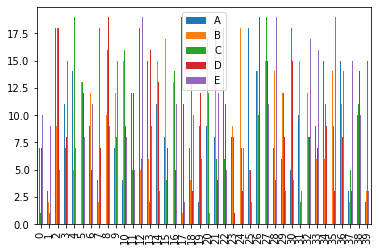

In [13]:
df.plot(kind = 'bar')

<AxesSubplot:>

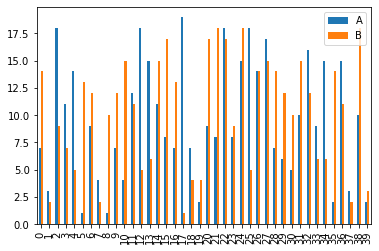

In [14]:
df[['A','B']].plot(kind = 'bar')

<AxesSubplot:>

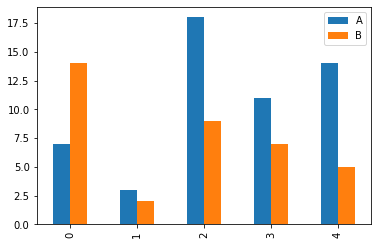

In [15]:
df[['A','B']].head().plot(kind = 'bar')

<AxesSubplot:>

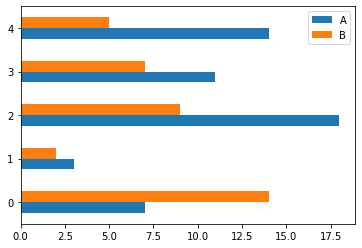

In [16]:
df[['A','B']].head().plot(kind = 'barh')

##### Area Plot

<AxesSubplot:>

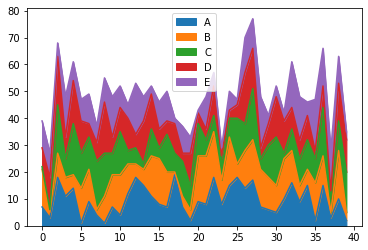

In [17]:
df.plot(kind = 'area')

<AxesSubplot:>

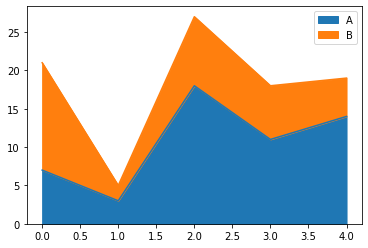

In [18]:
df[['A','B']].head().plot(kind = 'area')

##### Box Plot

<AxesSubplot:>

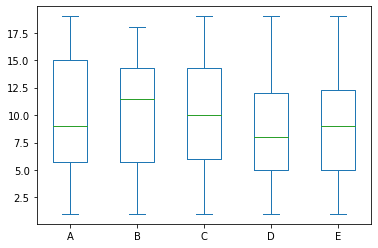

In [19]:
df.plot(kind = 'box')

##### Histogram

<AxesSubplot:ylabel='Frequency'>

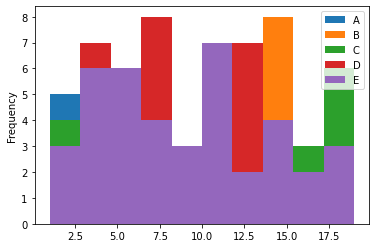

In [20]:
df.plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

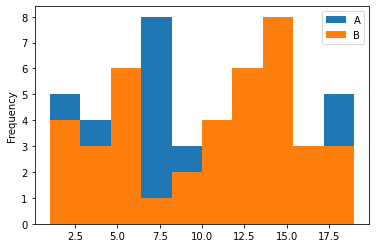

In [21]:
df[['A','B']].plot(kind = 'hist')

##### Kernel Density Estimation (KDE)

<AxesSubplot:ylabel='Density'>

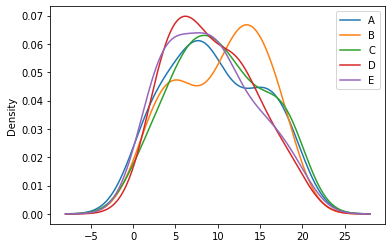

In [22]:
df.plot(kind = 'kde')

##### Scatter Plot

<AxesSubplot:xlabel='A', ylabel='B'>

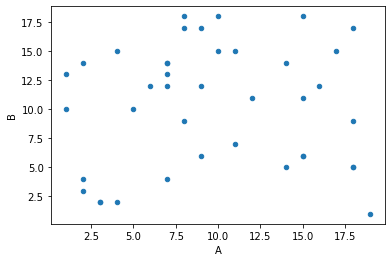

In [23]:
df.plot( x = 'A', y = 'B', kind = 'scatter')

## 33. Nilai Kumulatif pada Pandas Data Frame

##### Persiapan Data Frame

In [24]:
d = {'pemain' : ['Budi', ' Joni', 'Iman', 'Budi', 'Budi', 'Iman', 'Asep', 'Joni'],
     'goal' : [2, 1, 3, 1, 1, 2, 2, 3]}

df = pd.DataFrame(d)
df

,pemain,goal
0,Budi,2
1,Joni,1
2,Iman,3
3,Budi,1
4,Budi,1
5,Iman,2
6,Asep,2
7,Joni,3


##### Menampilkan nilai kumulatif (cummulative)

In [25]:
df['goal'].cumsum().to_frame()

,goal
0,2
1,3
2,6
3,7
4,8
5,10
6,12
7,15


In [26]:
df['jumlah_goal_kumulatif'] = df['goal'].cumsum()
df

,pemain,goal,jumlah_goal_kumulatif
0,Budi,2,2
1,Joni,1,3
2,Iman,3,6
3,Budi,1,7
4,Budi,1,8
5,Iman,2,10
6,Asep,2,12
7,Joni,3,15


In [27]:
df['jumlah_goal_kumulatif_tiap_pemain'] = df.groupby('pemain')['goal'].cumsum()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain
0,Budi,2,2,2
1,Joni,1,3,1
2,Iman,3,6,3
3,Budi,1,7,3
4,Budi,1,8,4
5,Iman,2,10,5
6,Asep,2,12,2
7,Joni,3,15,3


In [28]:
df['cummax'] = df['goal'].cummax()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax
0,Budi,2,2,2,2
1,Joni,1,3,1,2
2,Iman,3,6,3,3
3,Budi,1,7,3,3
4,Budi,1,8,4,3
5,Iman,2,10,5,3
6,Asep,2,12,2,3
7,Joni,3,15,3,3


In [29]:
df['cummin'] = df['goal'].cummin()
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax,cummin
0,Budi,2,2,2,2,2
1,Joni,1,3,1,2,1
2,Iman,3,6,3,3,1
3,Budi,1,7,3,3,1
4,Budi,1,8,4,3,1
5,Iman,2,10,5,3,1
6,Asep,2,12,2,3,1
7,Joni,3,15,3,3,1


In [30]:
df['cumprod'] = df['goal'].cumprod() # perkalian kumulatif
df

,pemain,goal,jumlah_goal_kumulatif,jumlah_goal_kumulatif_tiap_pemain,cummax,cummin,cumprod
0,Budi,2,2,2,2,2,2
1,Joni,1,3,1,2,1,2
2,Iman,3,6,3,3,1,6
3,Budi,1,7,3,3,1,6
4,Budi,1,8,4,3,1,6
5,Iman,2,10,5,3,1,12
6,Asep,2,12,2,3,1,24
7,Joni,3,15,3,3,1,72


## 34. Mapping Data Frame dengan applymap

##### Persiapan Data Frame

In [31]:
df = pd.DataFrame({'jenis_kelamin' : ['Pria','Wanita','lelaki','Lelaki','perempuan'],
                  'usia' : [23, 21, 24, 22, 21],
                  'shift' : ['pagi', 'siang', 'malam', 'Siang', 'pagi']})
df

,jenis_kelamin,usia,shift
0,Pria,23,pagi
1,Wanita,21,siang
2,lelaki,24,malam
3,Lelaki,22,Siang
4,perempuan,21,pagi


##### Mapping pada Data Frame dengan `applymap()`

In [32]:
# jika type data str maka digunakan lowercase
df = df.applymap(lambda x: x.lower() if type(x) == str else x)
df

,jenis_kelamin,usia,shift
0,pria,23,pagi
1,wanita,21,siang
2,lelaki,24,malam
3,lelaki,22,siang
4,perempuan,21,pagi


##### `applymap()` dengan dictionary

In [33]:
mapping = {'pria' : 'L',
          'lelaki' : 'L',
          'wanita' : 'P',
          'perempuan' : 'P',
          'pagi' : 1,
          'siang' : 2,
          'malam' : 3 }

df.applymap(mapping.get)

,jenis_kelamin,usia,shift
0,L,None,1
1,P,None,2
2,L,None,3
3,L,None,2
4,P,None,1


In [34]:
df[['jenis_kelamin', 'shift']] = df[['jenis_kelamin', 'shift']].applymap(mapping.get)
df

,jenis_kelamin,usia,shift
0,L,23,1
1,P,21,2
2,L,24,3
3,L,22,2
4,P,21,1


## 35. Memadukan fungsi agregasi dengan transform

##### Persiapan Data Frame

In [35]:
d = {'no_nota' : [1, 1, 1, 2, 2, 3, 4, 5],
    'kopi' : ['latte', 'cappucino', 'espresso', 'latte', 'espresso', 'cappucino', 'latte', 'espresso'],
    'harga' : [50, 60, 80, 150, 120, 60, 180, 40]}

df = pd.DataFrame(d)
df

,no_nota,kopi,harga
0,1,latte,50
1,1,cappucino,60
2,1,espresso,80
3,2,latte,150
4,2,espresso,120
5,3,cappucino,60
6,4,latte,180
7,5,espresso,40


##### Menghitung total harga untuk tiap nomor nota

In [36]:
df.groupby('no_nota')['harga'].sum().to_frame()

,harga
no_nota,
1,190
2,270
3,60
4,180
5,40


In [37]:
# membuat kolom baru total_harga
df['total_harga'] = df.groupby('no_nota')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga
0,1,latte,50,190
1,1,cappucino,60,190
2,1,espresso,80,190
3,2,latte,150,270
4,2,espresso,120,270
5,3,cappucino,60,60
6,4,latte,180,180
7,5,espresso,40,40


##### Menghitung total omset untuk tiap jenjis kopi yang terjual

In [38]:
df.groupby('kopi')['harga'].sum().to_frame()

,harga
kopi,
cappucino,120
espresso,240
latte,380


In [39]:
df['total_omset'] = df.groupby('kopi')['harga'].transform(sum)
df

,no_nota,kopi,harga,total_harga,total_omset
0,1,latte,50,190,380
1,1,cappucino,60,190,120
2,1,espresso,80,190,240
3,2,latte,150,270,380
4,2,espresso,120,270,240
5,3,cappucino,60,60,120
6,4,latte,180,180,380
7,5,espresso,40,40,240


## 36. Menyatukan kolom pada Pandas Data Frame

##### Persiapan Data Frame

In [40]:
data = {'nama' : ['bayu', ' indra', 'devi', 'agni'],
       'jenis_kelamin' : ['L', 'L', 'P', 'P'],
       'usia' : [23, 21, 22, 25]}

df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,P,25


##### Menyatukan kolom dengan `str.cat()`

In [41]:
df['nama'].str.cat(df['jenis_kelamin'], sep = ', ').to_frame()

,nama
0,"bayu, L"
1,"indra, L"
2,"devi, P"
3,"agni, P"


In [42]:
df['nama_jk'] = df['nama'].str.cat(df['jenis_kelamin'], sep = ', ')
df

,nama,jenis_kelamin,usia,nama_jk
0,bayu,L,23,"bayu, L"
1,indra,L,21,"indra, L"
2,devi,P,22,"devi, P"
3,agni,P,25,"agni, P"


In [43]:
# satu tipe data -> str
df['nama'].str.cat(df['usia'].astype('str'), sep = ' - ').to_frame()

,nama
0,bayu - 23
1,indra - 21
2,devi - 22
3,agni - 25


In [44]:
df['nama_usia'] = df['nama'].str.cat(df['usia'].astype('str'), sep = ' - ')
df

,nama,jenis_kelamin,usia,nama_jk,nama_usia
0,bayu,L,23,"bayu, L",bayu - 23
1,indra,L,21,"indra, L",indra - 21
2,devi,P,22,"devi, P",devi - 22
3,agni,P,25,"agni, P",agni - 25


## 37. Seleksi baris dengan banyak kriterioa pada Data Frame

##### Persiapan Data Frame

In [46]:
df = pd.read_csv('./titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


##### Seleksi baris dengan banyak kriteris

In [47]:
df[(df['sex'] == 'female') & (df['age']>= 60) & (df['embarked'] == 'S') & (df['survived'] == 1)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [48]:
df[
    (df['sex'] == 'female') & 
    (df['age']>= 60) & 
    (df['embarked'] == 'S') & 
    (df['survived'] == 1)
]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


In [49]:
kr1 = (df['sex'] == 'female') 
kr2 = (df['age']>= 60) 
kr3 = (df['embarked'] == 'S') 
kr4 = (df['survived'] == 1)

df[kr1 & kr2 & kr3 & kr4]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
83,1,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.5500,B26,S
116,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
1261,3,1,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S


## 38. Parameter header dan skiprows pada read_csv

##### Persiapan Data Frame

In [51]:
df = pd.read_csv('./Iris_error.csv')
df.head()

,1,5.1,3.5,1.4,0.2,Iris-error
0,2,4.9,3.0,1.4,0.2,Iris-error
1,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-error


In [52]:
df = pd.read_csv('./Iris_error.csv', header = 2, skiprows = [5,6])
# header dan skiprows index sesuai file csv
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3,4.7,3.2,1.3,0.2,Iris-setosa
1,4,4.6,3.1,1.5,0.2,Iris-setosa
2,7,4.6,3.4,1.4,0.3,Iris-setosa
3,8,5.0,3.4,1.5,0.2,Iris-setosa
4,9,4.4,2.9,1.4,0.2,Iris-setosa


## 39. Mengacak urutan baris pada Data Frame

##### Persiapan Data Frame

In [56]:
n_rows = 6
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 5, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,4,1,1,1,1
1,4,2,1,1,4
2,4,3,2,3,4
3,3,4,3,4,3
4,3,1,2,2,4
5,2,3,3,1,2


##### Mengacak urutan baris pada DataFrame

In [57]:
df.sample(frac = 1.0, random_state = 1)

,A,B,C,D,E
2,4,3,2,3,4
1,4,2,1,1,4
4,3,1,2,2,4
0,4,1,1,1,1
3,3,4,3,4,3
5,2,3,3,1,2


In [58]:
# frac = 1.0 : data diambil seluruhnya hanya barisnya yg diacak
df.sample(frac = 1.0, random_state = 1).reset_index(drop = True)

,A,B,C,D,E
0,4,3,2,3,4
1,4,2,1,1,4
2,3,1,2,2,4
3,4,1,1,1,1
4,3,4,3,4,3
5,2,3,3,1,2


## 40. Akses sekelompok data pada Data Frame

##### Persiapan Data Frame

In [63]:
df = pd.read_csv('./titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


##### Mengakses sekelompok data yang sudah terkelompok dengan `get_group()`

In [64]:
grouped_df = df.groupby('sex')

In [65]:
grouped_df.get_group('female').head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C


In [66]:
grouped_df = df.groupby('survived')

In [67]:
 grouped_df.get_group(1).head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.5250,C62 C64,C
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.00,0,0,PC 17477,69.3000,B35,C
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.00,0,0,19877,78.8500,NaN,S
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.00,0,0,27042,30.0000,A23,S
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C


## 41. Agregasi pada banyak kolom Data Frame dengan agg

##### Persiapan Data Frame

In [68]:
df = pd.read_csv('./titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


##### Menerapkan aggregasi pada sejumlah kolom dengan `agg()`

In [69]:
df.groupby('pclass').agg({'pclass': 'count',
                         'age' : ['mean', 'max'],
                         'survived' : 'mean'})

pclass        age        survived
        count       mean   max      mean
pclass                                  
1         323  39.159930  80.0  0.619195
2         277  29.506705  70.0  0.429603
3         709  24.816367  74.0  0.255289

In [73]:
df.groupby('pclass').agg(n_pass = ('pclass', 'count'),
                         avg_age = ('age' ,'mean'),
                         max_age = ('age' ,'max'),
                         survival_rate = ('survived' ,'mean'))

,n_pass,avg_age,max_age,survival_rate
pclass,,,,
1,323,39.159930,80.0,0.619195
2,277,29.506705,70.0,0.429603
3,709,24.816367,74.0,0.255289


## 42. Mengurutkan data kolom pada Data Frame

##### Persiapan Data Frame

In [74]:
df = pd.read_csv('./titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


##### Mengurutkan data berdasarkan kolom tertentu

In [75]:
df.sort_values('age').head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
1240,3,1,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
1111,3,0,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S


In [76]:
df.sort_values('age', ascending = False).head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
61,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
1235,3,0,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
135,1,0,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C


In [77]:
df.sort_values(['survived', 'age']).head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
1111,3,0,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
826,3,0,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
937,3,0,"Klasen, Miss. Gertrud Emilia",female,1.00,1,1,350405,12.1833,NaN,S
1101,3,0,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


## 43. Menangani whitespace pada Pandas Data Frame

##### Persiapan Data Frame

In [78]:
data = {'nim' : ['10', '11', '12', '13', '  '],
       'nama' : ['adi', '  ', 'tejo', '  ', 'bejo']}

df = pd.DataFrame(data)
df

,nim,nama
0,10,adi
1,11,
2,12,tejo
3,13,
4,,bejo


##### Menangani whitespace pada Data Frame

In [79]:
df.info()
# menghasilkan output 5 non-null 
# menunjukkan tidak mendeteksi nilai NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nim     5 non-null      object
 1   nama    5 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


In [81]:
# mengganti karakter spasi
# regex : reguler expression
# ^ : awal
# $ : akhir
# \s* : \s adalah spasi dengan jumlah yang tidak bisa ditentukan
df = df.replace(r'^\s*$', np.nan, regex = True)
df

,nim,nama
0,10,adi
1,11,NaN
2,12,tejo
3,13,NaN
4,NaN,bejo


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nim     4 non-null      object
 1   nama    3 non-null      object
dtypes: object(2)
memory usage: 208.0+ bytes


## 44. Menata ulang kolom Data Frame

##### Persiapan Data Frame

In [83]:
n_rows = 5
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,1,4,7,6,4
1,3,1,6,9,8
2,9,9,3,1,2
3,9,7,3,1,1
4,3,6,9,5,3


##### Menata ulang penempatan kolom pada Data Frame

In [84]:
df[['D', 'C', 'A', 'E', 'B']]

,D,C,A,E,B
0,6,7,1,4,4
1,9,6,3,8,1
2,1,3,9,2,9
3,1,3,9,1,7
4,5,9,3,3,6


In [85]:
df

,A,B,C,D,E
0,1,4,7,6,4
1,3,1,6,9,8
2,9,9,3,1,2
3,9,7,3,1,1
4,3,6,9,5,3


In [87]:
df = df[['D', 'C', 'A', 'E', 'B']]
df

,D,C,A,E,B
0,6,7,1,4,4
1,9,6,3,8,1
2,1,3,9,2,9
3,1,3,9,1,7
4,5,9,3,3,6


## 45. Memadukan loc dan iloc untuk seleksi data pada Data Frame

##### Persiapan Data Frame

In [88]:
df = pd.read_csv('./titanicfull.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


##### Memadukan `loc` dan `iloc` untuk melakukan seleksi data

In [89]:
df.iloc[15:20, :].loc[:, 'name':'age']

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


In [90]:
df.loc[:, 'name':'age'].iloc[15:20, :]

,name,sex,age
15,"Baumann, Mr. John D",male,NaN
16,"Baxter, Mr. Quigg Edmond",male,24.0
17,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0
18,"Bazzani, Miss. Albina",female,32.0
19,"Beattie, Mr. Thomson",male,36.0


## 46. Seleksi weekdays dan weekends pada data deret waktu

##### Persiapan Data Frame

In [3]:
n_rows = 365
n_cols = 2
cols = ['col1','col2']

df = pd.DataFrame(np.random.randint(1, 20, size = (n_rows, n_cols)),
                 columns = cols)
df.index = pd.util.testing.makeDateIndex(n_rows, freq = 'D')
df

,col1,col2
2000-01-01,19,15
2000-01-02,19,9
2000-01-03,9,14
2000-01-04,7,11
2000-01-05,15,10
...,...,...
2000-12-26,14,4
2000-12-27,4,14
2000-12-28,4,16
2000-12-29,10,9


##### Seleksi weekdays dan weekends 

In [5]:
# data frame harus berupa time series
weekdays_df = df[df.index.dayofweek.isin([0, 1, 2, 3, 4])]
weekdays_df.head(7)

,col1,col2
2000-01-03,9,14
2000-01-04,7,11
2000-01-05,15,10
2000-01-06,16,11
2000-01-07,19,9
2000-01-10,6,9
2000-01-11,2,14


In [6]:
weekends_df = df[df.index.dayofweek.isin([5, 6])]
weekends_df.head(7)

,col1,col2
2000-01-01,19,15
2000-01-02,19,9
2000-01-08,2,13
2000-01-09,1,11
2000-01-15,3,7
2000-01-16,15,2
2000-01-22,5,3


## 47. Penanganan kolom dengan tipe data beragam 

##### Persiapan Data Frame

In [8]:
d = {'nama' : ['bejo','tejo', 'mati','timi', 'cecep'],
    'ipk' : [2, '3', 3, 2.75, '3.25']}
df = pd.DataFrame(d)
df

,nama,ipk
0,bejo,2
1,tejo,3
2,mati,3
3,timi,2.75
4,cecep,3.25


##### Deteksi dan penanganan kolom dengan tipe data beragam (mixed data types)

In [9]:
df.dtypes

nama    object
ipk     object
dtype: object

In [10]:
df['ipk'].apply(type)

0      <class 'int'>
1      <class 'str'>
2      <class 'int'>
3    <class 'float'>
4      <class 'str'>
Name: ipk, dtype: object

In [11]:
df['ipk'].apply(type).value_counts()

<class 'int'>      2
<class 'str'>      2
<class 'float'>    1
Name: ipk, dtype: int64

In [12]:
df['ipk'] = df['ipk'].astype(float)

In [13]:
df['ipk'].apply(type).value_counts()

<class 'float'>    5
Name: ipk, dtype: int64

## 48. Cummulative Count pada Pandas Data Frame

##### Persiapan Data Frame

In [14]:
d = {'penjual' : ['bejo', 'tejo', 'mati', 'bejo', 'cecep', 'tejo', 'mati', 'bejo'],
    'barang' : ['monitor', 'monitor', 'keyboard', 'mouse', 'keyboard', 'monitor', 'laptop', 'monitor']}

df = pd.DataFrame(d)
df

,penjual,barang
0,bejo,monitor
1,tejo,monitor
2,mati,keyboard
3,bejo,mouse
4,cecep,keyboard
5,tejo,monitor
6,mati,laptop
7,bejo,monitor


##### Mengenal CUmmulative Count dengan `cumcount()`

In [16]:
df['count_tiap_penjual'] = df.groupby('penjual').cumcount() + 1
df

,penjual,barang,count_tiap_penjual
0,bejo,monitor,1
1,tejo,monitor,1
2,mati,keyboard,1
3,bejo,mouse,2
4,cecep,keyboard,1
5,tejo,monitor,2
6,mati,laptop,2
7,bejo,monitor,3


In [17]:
df['count_tiap_penjual'] = df.groupby('barang').cumcount() + 1
df

,penjual,barang,count_tiap_penjual
0,bejo,monitor,1
1,tejo,monitor,2
2,mati,keyboard,1
3,bejo,mouse,1
4,cecep,keyboard,2
5,tejo,monitor,3
6,mati,laptop,1
7,bejo,monitor,4


In [18]:
df['count_pasangan_kolom'] = df.groupby(['penjual', 'barang']).cumcount() + 1
df

,penjual,barang,count_tiap_penjual,count_pasangan_kolom
0,bejo,monitor,1,1
1,tejo,monitor,2,1
2,mati,keyboard,1,1
3,bejo,mouse,1,1
4,cecep,keyboard,2,1
5,tejo,monitor,3,2
6,mati,laptop,1,1
7,bejo,monitor,4,2


## 49. Seleksi kolom dengan `f-string`

##### Persiapan Data Frame

In [20]:
df = pd.read_csv('./Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df['SepalWidthCm'].to_frame().head()

,SepalWidthCm
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


In [22]:
part = 'Sepal'

df[f'{part}WidthCm'].to_frame().head()

,SepalWidthCm
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6


In [23]:
df[['PetalWidthCm', 'PetalLengthCm']].head()

,PetalWidthCm,PetalLengthCm
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4


In [24]:
part = 'Petal'

df[[f'{part}WidthCm', f'{part}LengthCm']].head()

,PetalWidthCm,PetalLengthCm
0,0.2,1.4
1,0.2,1.4
2,0.2,1.3
3,0.2,1.5
4,0.2,1.4


## 50. Membuat kolom baru dengan for loop dan f-string

##### Persiapan Data Frame

In [26]:
d = {'penjual' : ['bejo', 'tejo', 'mati', 'bejo', 'cecep', 'tejo', 'mati', 'bejo'],
    'barang' : ['monitor', 'monitor', 'keyboard', 'mouse', 'keyboard', 'monitor', 'laptop', 'monitor']}

df = pd.DataFrame(d)
df

,penjual,barang
0,bejo,monitor
1,tejo,monitor
2,mati,keyboard
3,bejo,mouse
4,cecep,keyboard
5,tejo,monitor
6,mati,laptop
7,bejo,monitor


##### Membuat kolom baru dengan `for loop` dan `f-string`

In [27]:
cols = ['penjual', 'barang']

for col in cols:
    df[f'count_tiap_{col}'] = df.groupby(col).cumcount() + 1
    
df

,penjual,barang,count_tiap_penjual,count_tiap_barang
0,bejo,monitor,1,1
1,tejo,monitor,1,2
2,mati,keyboard,1,1
3,bejo,mouse,2,1
4,cecep,keyboard,1,2
5,tejo,monitor,2,3
6,mati,laptop,2,1
7,bejo,monitor,3,4


## 51. Seleksi baris dengan between

##### Persiapan Data Frame

In [28]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size = (n_rows, n_cols)),
                 columns = cols)
df

,A,B,C,D,E
0,2,2,8,1,8
1,6,7,6,2,5
2,3,6,6,4,3
3,7,8,5,3,9
4,6,4,1,7,3
5,4,9,1,6,5
6,2,9,4,9,5
7,6,6,3,3,9
8,6,8,4,1,8
9,4,7,4,1,3


##### Seleksi baris dengan `between()`

In [29]:
df[df['A'].between(2, 5)]

,A,B,C,D,E
0,2,2,8,1,8
2,3,6,6,4,3
5,4,9,1,6,5
6,2,9,4,9,5
9,4,7,4,1,3


In [31]:
df[df['A'].between(2, 5, inclusive = False)]

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10624/2362531835.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated infavour of `both` or `neither`.
  df[df['A'].between(2, 5, inclusive = False)]


,A,B,C,D,E
2,3,6,6,4,3
5,4,9,1,6,5
9,4,7,4,1,3


## 52. Transformasi kolom menjadi baris

##### Persiapan Data Frame

In [32]:
d = {
    'kode area' : [123, 456, 789, 321],
    'pabrik' : [4, 2, 5, 0],
    'gudang' : [2, 4, 7, 3],
    'toko' : [64, 32, 15, 24]
}

df = pd.DataFrame(d)
df

,kode area,pabrik,gudang,toko
0,123,4,2,64
1,456,2,4,32
2,789,5,7,15
3,321,0,3,24


##### Transformasi kolom menjadi baris

In [33]:
df = df.melt(id_vars = 'kode area',
            var_name = 'jenis_bangunan',
            value_name = 'jumlah')
df

,kode area,jenis_bangunan,jumlah
0,123,pabrik,4
1,456,pabrik,2
2,789,pabrik,5
3,321,pabrik,0
4,123,gudang,2
5,456,gudang,4
6,789,gudang,7
7,321,gudang,3
8,123,toko,64
9,456,toko,32


## 53. Membuat kategori baru menurut threshold

##### Persiapan Data Frame

In [3]:
d = {
    'hobi' : ['jogging', 'mancing', 'renang', 
             'mancing', 'mancing', 'baca', 
             'baca', 'mancing', 'fotografi',
             'mancing', 'camping']    
}

df = pd.DataFrame(d)
df

,hobi
0,jogging
1,mancing
2,renang
3,mancing
4,mancing
5,baca
6,baca
7,mancing
8,fotografi
9,mancing


##### Membuat kategori baru menurut threshold (ambang batas)

In [4]:
df['hobi'].value_counts()

mancing      5
baca         2
jogging      1
renang       1
fotografi    1
camping      1
Name: hobi, dtype: int64

In [6]:
persentase = df['hobi'].value_counts(normalize = True)
persentase

mancing      0.454545
baca         0.181818
jogging      0.090909
renang       0.090909
fotografi    0.090909
camping      0.090909
Name: hobi, dtype: float64

In [7]:
threshold = 0.1
hobi_lain = persentase[persentase < threshold].index
hobi_lain

Index(['jogging', 'renang', 'fotografi', 'camping'], dtype='object')

In [9]:
df['hobi'] = df['hobi'].replace(hobi_lain, 'lainnya')
df['hobi']

0     lainnya
1     mancing
2     lainnya
3     mancing
4     mancing
5        baca
6        baca
7     mancing
8     lainnya
9     mancing
10    lainnya
Name: hobi, dtype: object

In [10]:
df['hobi'].value_counts(normalize = True)

mancing    0.454545
lainnya    0.363636
baca       0.181818
Name: hobi, dtype: float64

## 54. Menyimpan Data Frame sebagai file CSV

##### Persiapan Data Frame

In [11]:
data = {'nama' : ['bayu', 'indra', 'devi', ' agni'],
       'jenis_kelamin' : ['L', 'L', 'P', 'L'],
       'usia' : [23, 21, 22, 25]}

df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


##### Menyimpan Data Frame sebagai file CSV

In [12]:
df.to_csv('data_peserta.csv')

In [14]:
# df =pd.read_csv('data_peserta.csv')
df =pd.read_csv('data_peserta.csv', index_col = 0)

df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


In [15]:
df.to_csv('data_peserta.csv', index = False)
df =pd.read_csv('data_peserta.csv')
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


## 55. Menghitung jumlah baris menurut kriteria tertentu

##### Persiapan Data Frame

In [16]:
n_rows = 10
n_cols = 5
cols = tuple('ABCDE')

df = pd.DataFrame(np.random.randint(1, 10, size = (n_rows, n_cols)),
                 columns = cols)

df

,A,B,C,D,E
0,9,8,1,3,6
1,3,4,1,1,9
2,3,3,3,3,9
3,9,7,8,9,7
4,8,3,1,2,2
5,2,3,5,2,6
6,9,9,9,2,4
7,7,3,2,7,6
8,4,5,6,2,8
9,8,9,8,8,4


In [17]:
(df['A'] < 5).sum()

4

In [18]:
(df['A'] < 5).mean()

0.4

## 56. Mengeluarkan kolom dari Data Frame

##### Persiapan Data Frame

In [19]:
data = {'nama' : ['bayu', 'indra', 'devi', ' agni'],
       'jenis_kelamin' : ['L', 'L', 'P', 'L'],
       'usia' : [23, 21, 22, 25]}

df = pd.DataFrame(data)
df

,nama,jenis_kelamin,usia
0,bayu,L,23
1,indra,L,21
2,devi,P,22
3,agni,L,25


##### Mengeluarkan kolom dari Data Frame

In [20]:
usia = df.pop('usia').to_frame()

In [21]:
df

,nama,jenis_kelamin
0,bayu,L
1,indra,L
2,devi,P
3,agni,L


In [22]:
usia

,usia
0,23
1,21
2,22
3,25
